In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre URL-HTML cross)(3).csv")
data

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
0,0,0.999989,1.093585e-05,0.999989,1.093585e-05,0.999989,1.093585e-05
1,0,1.000000,5.712183e-20,1.000000,5.712183e-20,1.000000,5.712183e-20
2,0,1.000000,1.804390e-83,1.000000,1.804390e-83,1.000000,1.804390e-83
3,0,0.991853,8.147189e-03,0.991853,8.147189e-03,0.991853,8.147189e-03
4,0,0.998126,1.874161e-03,0.998126,1.874161e-03,0.998126,1.874161e-03
...,...,...,...,...,...,...,...
4647,1,0.010479,9.895206e-01,0.010479,9.895206e-01,0.010479,9.895206e-01
4648,0,0.999998,1.553756e-06,0.999998,1.553756e-06,0.999998,1.553756e-06
4649,0,1.000000,1.364359e-09,1.000000,1.364359e-09,1.000000,1.364359e-09
4650,0,1.000000,1.352582e-12,1.000000,1.352582e-12,1.000000,1.352582e-12


In [4]:
data.shape

(4652, 7)

In [5]:
data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'nn_prediction_non', 'nn_prediction_phish', 'nn2_prediction_non',
       'nn2_prediction_phish'],
      dtype='object')

In [6]:
data.describe()

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
count,4652.000000,4652.000000,4.652000e+03,4652.000000,4.652000e+03,4652.000000,4.652000e+03
mean,0.429278,0.650643,3.493573e-01,0.650643,3.493573e-01,0.650643,3.493573e-01
std,0.495026,0.448742,4.487424e-01,0.448742,4.487424e-01,0.448742,4.487424e-01
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.027878,6.423515e-13,0.027878,6.423515e-13,0.027878,6.423515e-13
50%,0.000000,0.999204,7.962438e-04,0.999204,7.962438e-04,0.999204,7.962438e-04
75%,1.000000,1.000000,9.721216e-01,1.000000,9.721216e-01,1.000000,9.721216e-01
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.4912 - accuracy: 0.8853 - val_loss: 0.3801 - val_accuracy: 0.8884
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8870 - val_loss: 0.3160 - val_accuracy: 0.8906
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8865 - val_loss: 0.3080 - val_accuracy: 0.8906
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8865 - val_loss: 0.3060 - val_accuracy: 0.8906
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8856 - val_loss: 0.3065 - val_accuracy: 0.8884
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8856 - val_loss: 0.3061 - val_accuracy: 0.8906
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8853 - val_loss: 0.3069 - val_accuracy: 0.8884

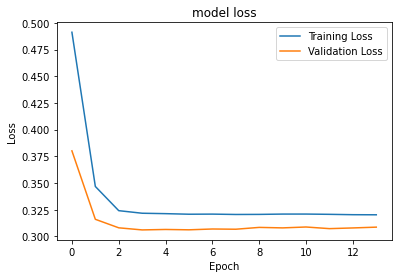

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       265
           1       0.96      0.78      0.86       201

    accuracy                           0.89       466
   macro avg       0.90      0.87      0.88       466
weighted avg       0.90      0.89      0.89       466

Accuracy: 0.8884120171673819
[[258   7]
 [ 45 156]]
Precision: 0.9571
Recall: 0.7761
F1 Score: 0.8571
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.4087 - accuracy: 0.8653 - val_loss: 0.3253 - val_accuracy: 0.8948
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8863 - val_loss: 0.3133 - val_accuracy: 0.8948
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8875 - val_loss: 0.3105 - val_accuracy: 0.8906
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8875 - val_loss: 0.3102 

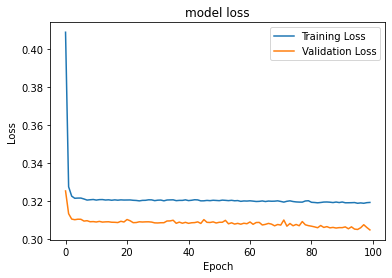

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       258
           1       0.94      0.81      0.87       208

    accuracy                           0.89       466
   macro avg       0.90      0.88      0.89       466
weighted avg       0.90      0.89      0.89       466

Accuracy: 0.8927038626609443
[[247  11]
 [ 39 169]]
Precision: 0.9389
Recall: 0.8125
F1 Score: 0.8711
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.4881 - accuracy: 0.8013 - val_loss: 0.3331 - val_accuracy: 0.8882
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8880 - val_loss: 0.3241 - val_accuracy: 0.8860
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8880 - val_loss: 0.3243 - val_accuracy: 0.8860
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8877 - val_loss: 0.3230 

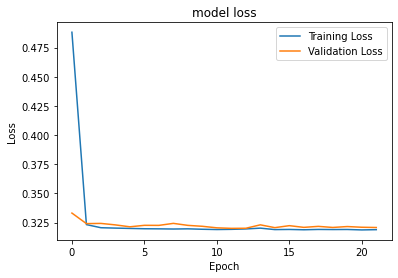

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       272
           1       0.91      0.81      0.86       193

    accuracy                           0.89       465
   macro avg       0.89      0.88      0.88       465
weighted avg       0.89      0.89      0.89       465

Accuracy: 0.8881720430107527
[[257  15]
 [ 37 156]]
Precision: 0.9123
Recall: 0.8083
F1 Score: 0.8571
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.4283 - accuracy: 0.8603 - val_loss: 0.3262 - val_accuracy: 0.8925
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8875 - val_loss: 0.3220 - val_accuracy: 0.8925
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8875 - val_loss: 0.3207 - val_accuracy: 0.8925
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8873 - val_loss: 0.3203 

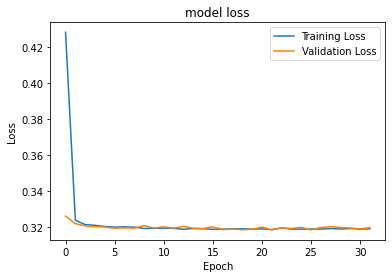

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       264
           1       0.93      0.82      0.87       201

    accuracy                           0.89       465
   macro avg       0.90      0.88      0.89       465
weighted avg       0.90      0.89      0.89       465

Accuracy: 0.8924731182795699
[[251  13]
 [ 37 164]]
Precision: 0.9266
Recall: 0.8159
F1 Score: 0.8677
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3692 - accuracy: 0.8737 - val_loss: 0.3347 - val_accuracy: 0.8796
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8873 - val_loss: 0.3311 - val_accuracy: 0.8796
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8887 - val_loss: 0.3319 - val_accuracy: 0.8796
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8877 - val_loss: 0.3337 

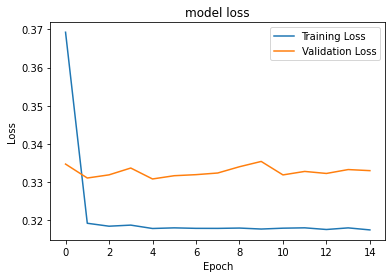

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       270
           1       0.97      0.74      0.84       195

    accuracy                           0.88       465
   macro avg       0.91      0.86      0.87       465
weighted avg       0.90      0.88      0.88       465

Accuracy: 0.8817204301075269
[[266   4]
 [ 51 144]]
Precision: 0.9730
Recall: 0.7385
F1 Score: 0.8397
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3917 - accuracy: 0.8643 - val_loss: 0.3368 - val_accuracy: 0.8839
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8892 - val_loss: 0.3364 - val_accuracy: 0.8817
Epoch 3/100
131/131 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.8875 - val_loss: 0.3361 - val_accuracy: 0.8817
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8877 - val_loss: 0.3360 

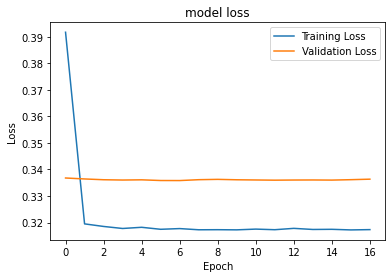

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       274
           1       0.95      0.75      0.84       191

    accuracy                           0.88       465
   macro avg       0.90      0.86      0.87       465
weighted avg       0.89      0.88      0.88       465

Accuracy: 0.8817204301075269
[[266   8]
 [ 47 144]]
Precision: 0.9474
Recall: 0.7539
F1 Score: 0.8397
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.4839 - accuracy: 0.8233 - val_loss: 0.3863 - val_accuracy: 0.8839
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8882 - val_loss: 0.3351 - val_accuracy: 0.8774
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8880 - val_loss: 0.3305 - val_accuracy: 0.8796
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8889 - val_loss: 0.3300 

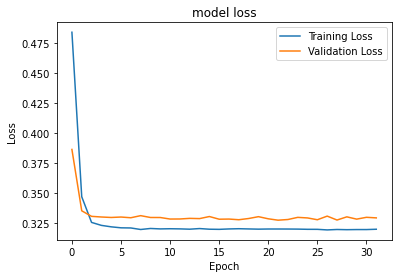

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       270
           1       0.90      0.80      0.85       195

    accuracy                           0.88       465
   macro avg       0.88      0.87      0.87       465
weighted avg       0.88      0.88      0.88       465

Accuracy: 0.8774193548387097
[[252  18]
 [ 39 156]]
Precision: 0.8966
Recall: 0.8000
F1 Score: 0.8455
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.4543 - accuracy: 0.8252 - val_loss: 0.3370 - val_accuracy: 0.8860
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8882 - val_loss: 0.3116 - val_accuracy: 0.8860
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8861 - val_loss: 0.3120 - val_accuracy: 0.8882
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8858 - val_loss: 0.3122 

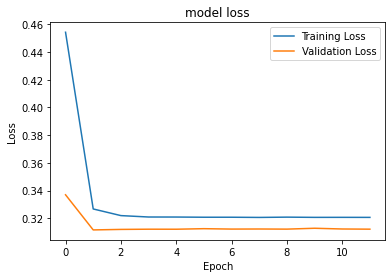

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       254
           1       0.93      0.80      0.86       211

    accuracy                           0.88       465
   macro avg       0.89      0.87      0.88       465
weighted avg       0.89      0.88      0.88       465

Accuracy: 0.8817204301075269
[[242  12]
 [ 43 168]]
Precision: 0.9333
Recall: 0.7962
F1 Score: 0.8593
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3831 - accuracy: 0.8746 - val_loss: 0.3729 - val_accuracy: 0.8645
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8904 - val_loss: 0.3740 - val_accuracy: 0.8667
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8880 - val_loss: 0.3722 - val_accuracy: 0.8645
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8885 - val_loss: 0.3749 

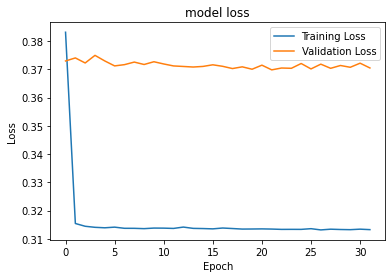

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       275
           1       0.93      0.73      0.82       190

    accuracy                           0.87       465
   macro avg       0.88      0.85      0.86       465
weighted avg       0.87      0.87      0.86       465

Accuracy: 0.8666666666666667
[[264  11]
 [ 51 139]]
Precision: 0.9267
Recall: 0.7316
F1 Score: 0.8176
Epoch 1/100
131/131 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8842 - val_loss: 0.2653 - val_accuracy: 0.9161
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8832 - val_loss: 0.2670 - val_accuracy: 0.9097
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8842 - val_loss: 0.2661 - val_accuracy: 0.9140
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8839 - val_loss: 0.2663 

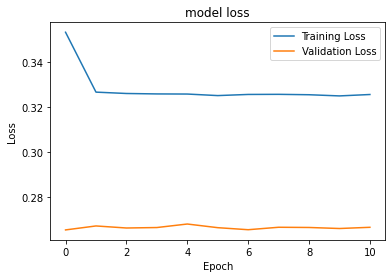

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       253
           1       0.99      0.82      0.89       212

    accuracy                           0.91       465
   macro avg       0.93      0.90      0.91       465
weighted avg       0.92      0.91      0.91       465

Accuracy: 0.9118279569892473
[[251   2]
 [ 39 173]]
Precision: 0.9886
Recall: 0.8160
F1 Score: 0.8941
Average Validation Accuracy: 0.8862836309935853


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

